In [50]:
!streamlit run app.py

^C


In [2]:
from plot import *

In [3]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import matplotlib.pyplot as plt

apmt_c = "royalblue"
non_apmt_c = "orange"
total_c = "limegreen"

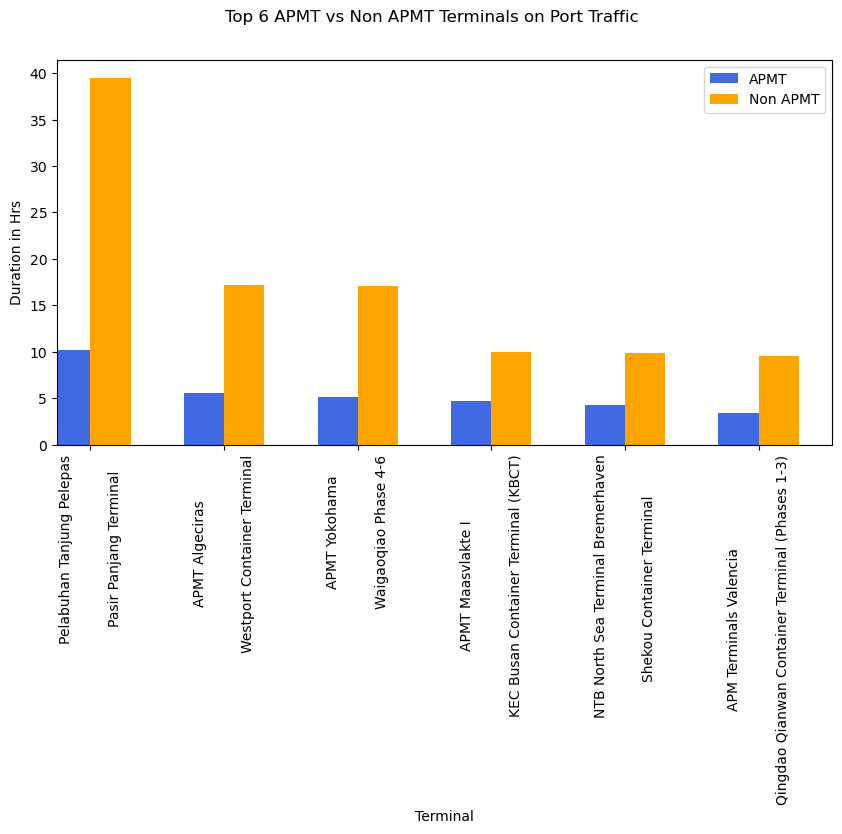

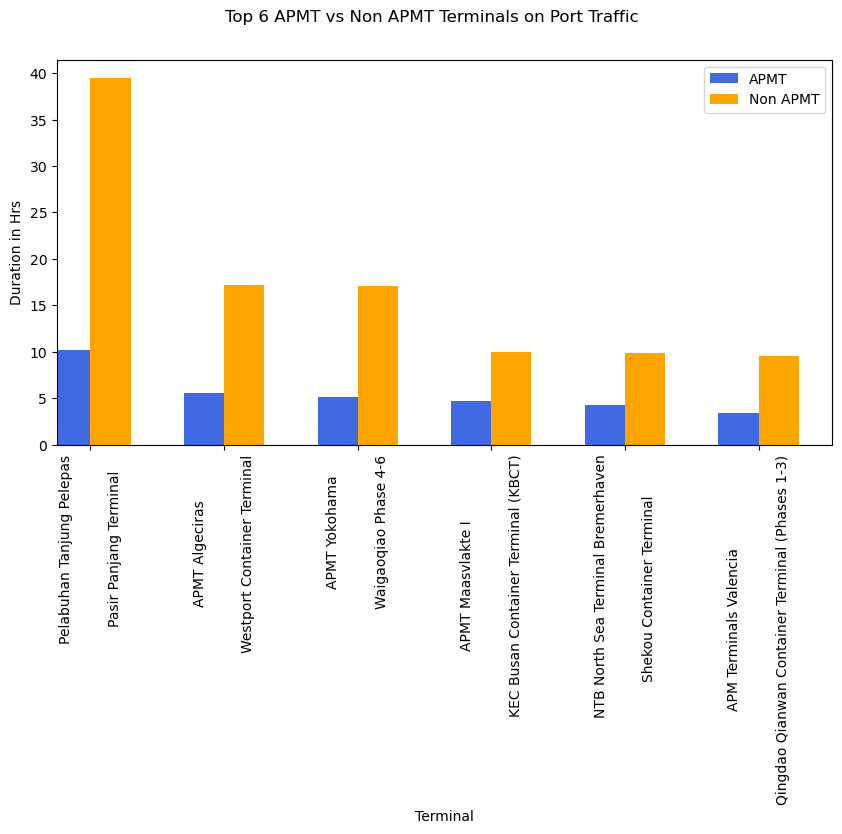

In [48]:
def top_6_APMT_vs_Non_APMT_Terminals_on_port_traffic():
    fig, axs = plt.subplots()
    title = "Top 6 APMT vs Non APMT Terminals on Port Traffic"
    plt.suptitle(title)

    plot_df = pd.read_csv("data/Top_6_APMT_vs_Non_APMT_Terminals_on_Port_Traffic.csv")
    apmt_plot_df = plot_df["APMT"].dropna()
    ap = list(plot_df.set_index("1")["APMT"].dropna().index)
    non_apmt_plot_df = plot_df["Non APMT"].dropna()
    nap = list(plot_df.set_index("1")["Non APMT"].dropna().index)

    apmt_plot_df.plot.bar(ax=axs,label="APMT",color="royalblue",position=1,figsize=(10, 5),width=0.3)
    non_apmt_plot_df.plot.bar(ax=axs,label="Non APMT",color="orange",position=0,figsize=(10, 5),width=0.3)

    plt.xticks(range(0,6),[ a +"\n\n\n" + n for a,n in zip(ap,nap)])
    plt.xlabel("Terminal")
    plt.ylabel("Duration in Hrs")
    plt.legend()
    
    return fig

top_6_APMT_vs_Non_APMT_Terminals_on_port_traffic()

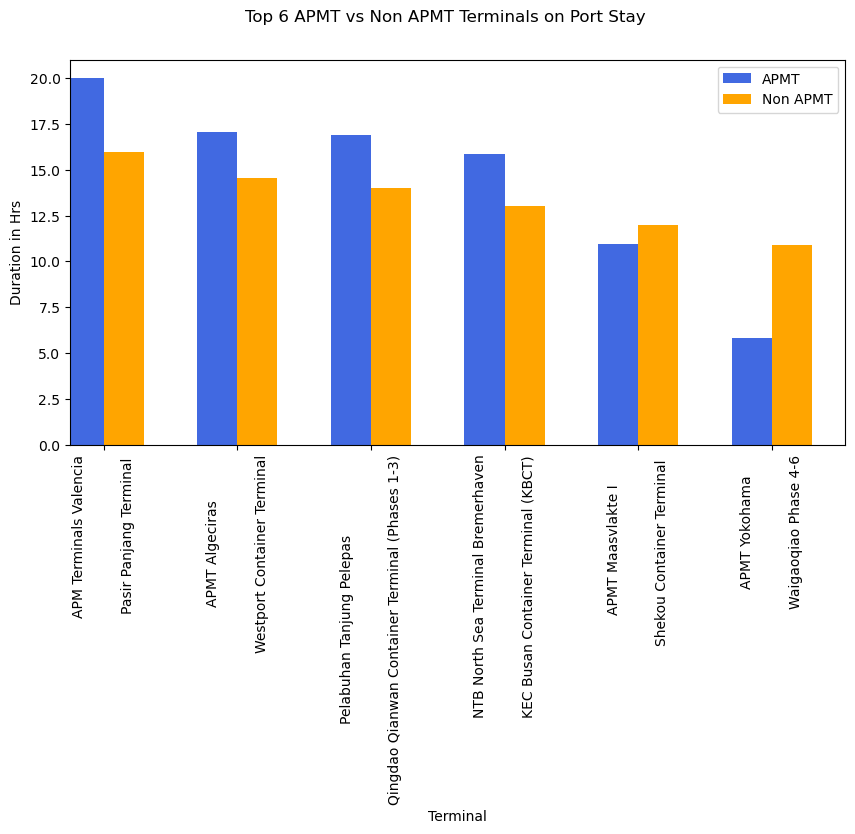

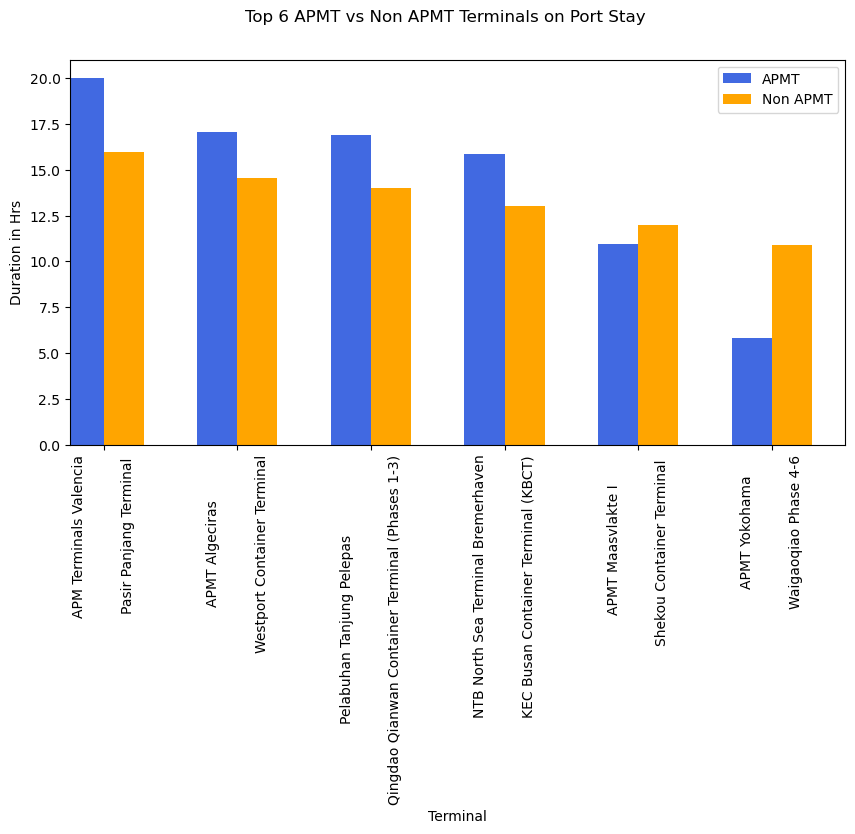

In [43]:
def top_6_APMT_vs_Non_APMT_Terminals_on_port_stay():
    fig, axs = plt.subplots()
    title = "Top 6 APMT vs Non APMT Terminals on Port Stay"
    plt.suptitle(title)

    plot_df = pd.read_csv("data/Top_6_APMT_vs_Non_APMT_Terminals_on_Port_Stay.csv")
    apmt_plot_df = plot_df["APMT"].dropna()
    ap = list(plot_df.set_index("0")["APMT"].dropna().index)
    non_apmt_plot_df = plot_df["Non APMT"].dropna()
    nap = list(plot_df.set_index("0")["Non APMT"].dropna().index)

    apmt_plot_df.plot.bar(ax=axs,label="APMT",color="royalblue",position=1,figsize=(10, 5),width=0.3)
    non_apmt_plot_df.plot.bar(ax=axs,label="Non APMT",color="orange",position=0,figsize=(10, 5),width=0.3)

    plt.xticks(range(0,6),[ a +"\n\n\n" + n for a,n in zip(ap,nap)])
    plt.xlabel("Terminal")
    plt.ylabel("Duration in Hrs")
    plt.legend()
    
    return fig

top_6_APMT_vs_Non_APMT_Terminals_on_port_stay()

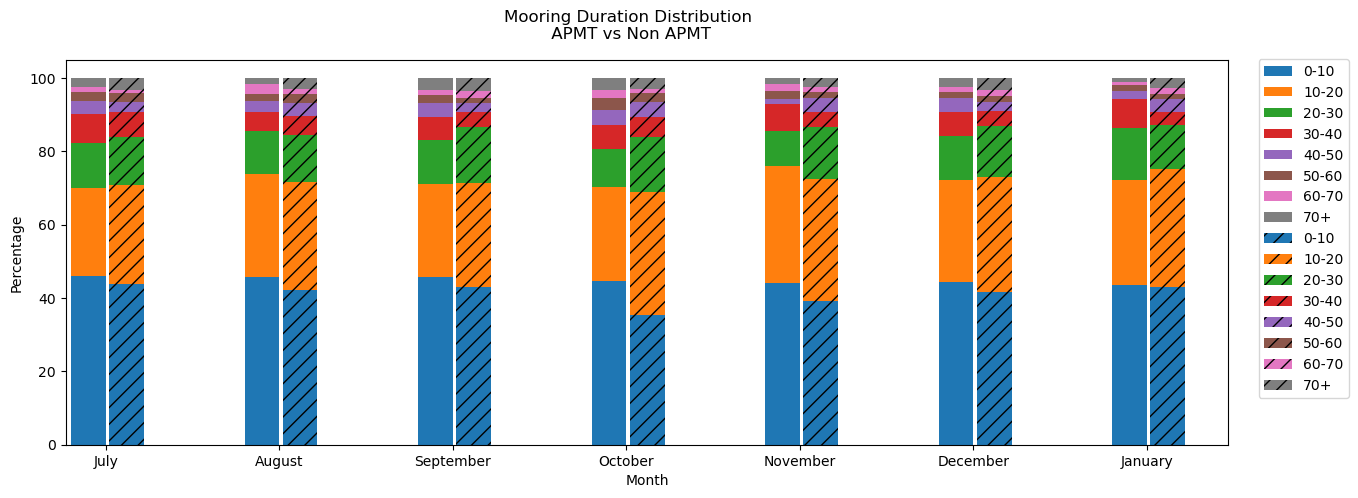

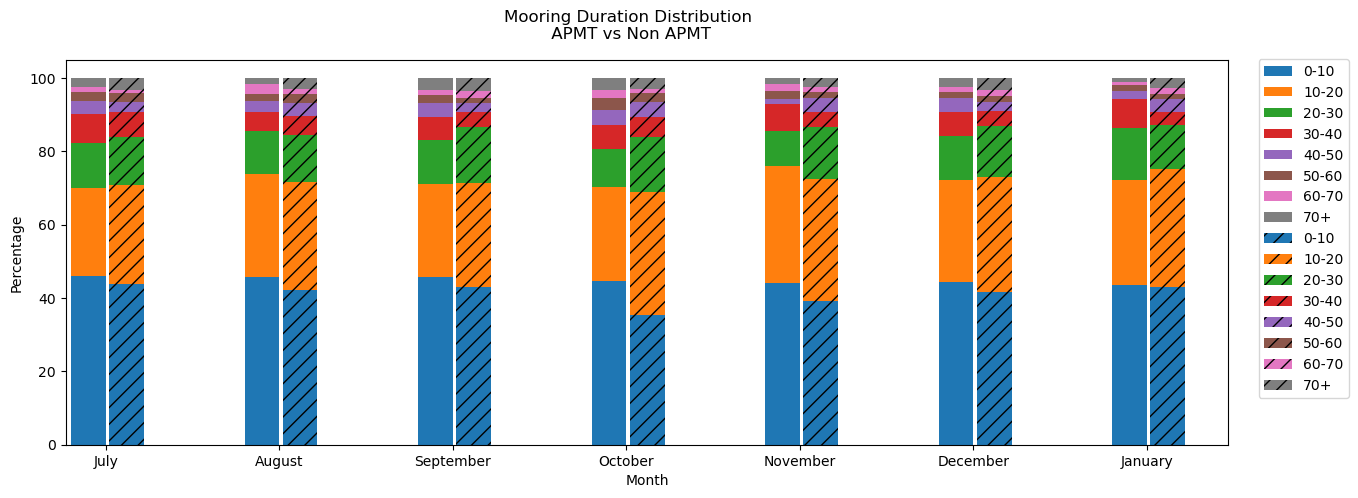

In [26]:
def mooring_duration_distribution():

    fig, axs = plt.subplots()

    non_apmt_full_lt = {}
    for lt, mon in zip(moor_anchor_df["non_apmt_port_calls_moor_data"].to_list(),list(moor_anchor_df.index)): 
        non_apmt_full_lt[mon] = [round(float(dur),2) for dur in lt[1:-1].split(", ")]

    apmt_full_lt = {}
    for lt,mon in zip(moor_anchor_df["apmt_port_calls_moor_data"].to_list(),list(moor_anchor_df.index)): 
        apmt_full_lt[mon] = [round(float(dur),2) for dur in lt[1:-1].split(", ")]

    apmt_plot_df = pd.DataFrame([apmt_full_lt]).T
    non_apmt_plot_df = pd.DataFrame([non_apmt_full_lt]).T

    apmt_plot_df["0-10"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y<10 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["10-20"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=10 and y<20  else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["20-30"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=20 and y<30 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["30-40"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=30 and y<40 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["40-50"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=40 and y<50 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["50-60"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=50 and y<60 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["60-70"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=60 and y<70 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["70+"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=70 else False, [float(val) for val in x]))) / len(x))*100)

    non_apmt_plot_df["0-10"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y<10 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["10-20"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=10 and y<20  else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["20-30"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=20 and y<30 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["30-40"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=30 and y<40 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["40-50"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=40 and y<50 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["50-60"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=50 and y<60 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["60-70"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=60 and y<70 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["70+"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=70 else False, [float(val) for val in x]))) / len(x))*100)

    apmt_plot_df.drop(0,axis=1).plot.bar(stacked=True,figsize=(15,5),position=1,width=.2,rot=0,label="APMT",ax=axs)
    non_apmt_plot_df.drop(0,axis=1).plot.bar(stacked=True,figsize=(15,5),position=-0.1,width=.2,rot=0,label="Non APMT",hatch="//",ax=axs)


    plt.suptitle("Mooring Duration Distribution\n APMT vs Non APMT")
    plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1.02))
    plt.ylabel("Percentage")
    plt.xlabel("Month")

    return fig

mooring_duration_distribution()

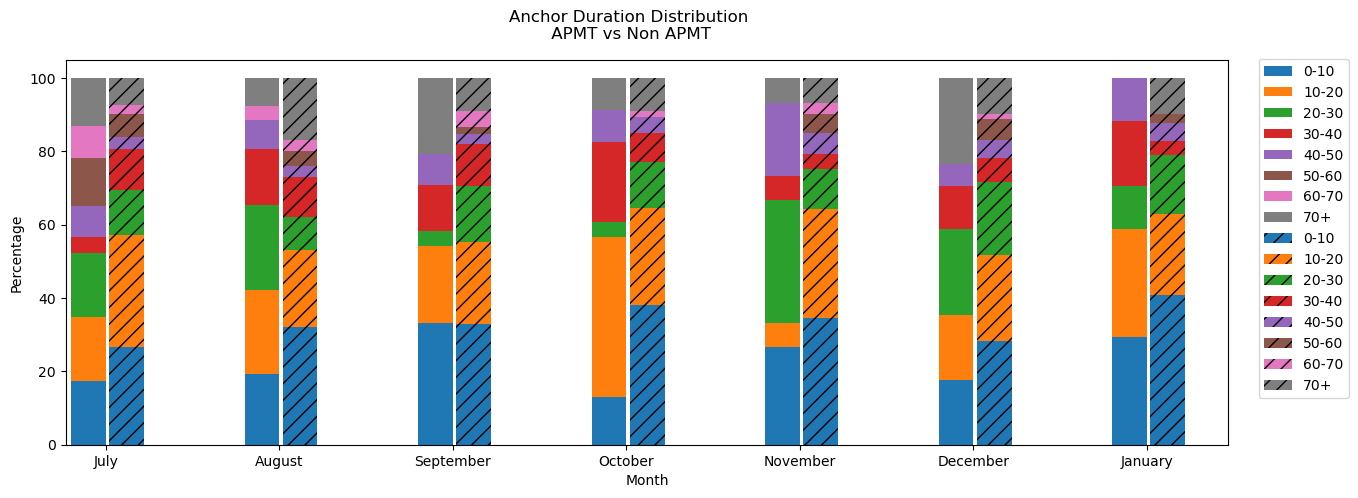

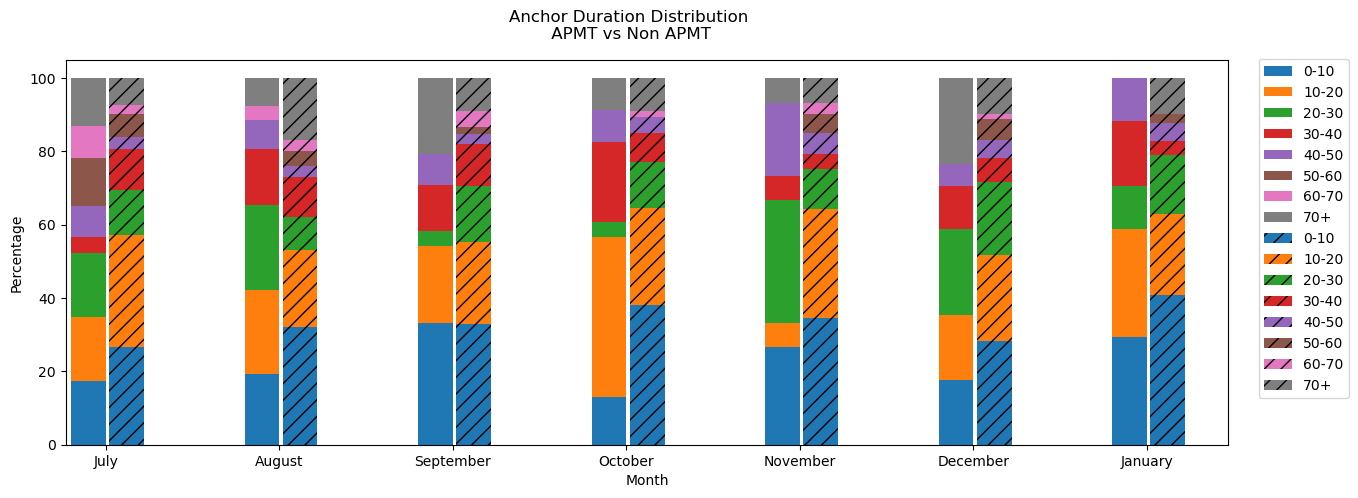

In [23]:
def anchor_duration_distribution():

    fig, axs = plt.subplots()

    non_apmt_full_lt = {}
    for lt, mon in zip(moor_anchor_df["non_apmt_port_calls_anchor_data"].to_list(),list(moor_anchor_df.index)): 
        non_apmt_full_lt[mon] = [round(float(dur),2) for dur in lt[1:-1].split(", ")]

    apmt_full_lt = {}
    for lt,mon in zip(moor_anchor_df["apmt_port_calls_anchor_data"].to_list(),list(moor_anchor_df.index)): 
        apmt_full_lt[mon] = [round(float(dur),2) for dur in lt[1:-1].split(", ")]

    apmt_plot_df = pd.DataFrame([apmt_full_lt]).T
    non_apmt_plot_df = pd.DataFrame([non_apmt_full_lt]).T

    apmt_plot_df["0-10"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y<10 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["10-20"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=10 and y<20  else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["20-30"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=20 and y<30 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["30-40"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=30 and y<40 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["40-50"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=40 and y<50 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["50-60"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=50 and y<60 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["60-70"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=60 and y<70 else False, [float(val) for val in x]))) / len(x))*100)
    apmt_plot_df["70+"] = apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=70 else False, [float(val) for val in x]))) / len(x))*100)

    non_apmt_plot_df["0-10"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y<10 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["10-20"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=10 and y<20  else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["20-30"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=20 and y<30 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["30-40"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=30 and y<40 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["40-50"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=40 and y<50 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["50-60"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=50 and y<60 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["60-70"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=60 and y<70 else False, [float(val) for val in x]))) / len(x))*100)
    non_apmt_plot_df["70+"] = non_apmt_plot_df[0].apply(lambda x: (len(list(filter(lambda y: True if y>=70 else False, [float(val) for val in x]))) / len(x))*100)

    apmt_plot_df.drop(0,axis=1).plot.bar(stacked=True,figsize=(15,5),position=1,width=.2,rot=0,label="APMT",ax=axs)
    non_apmt_plot_df.drop(0,axis=1).plot.bar(stacked=True,figsize=(15,5),position=-0.1,width=.2,rot=0,label="Non APMT",hatch="//",ax=axs)


    plt.suptitle("Anchor Duration Distribution\n APMT vs Non APMT")
    plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1.02))
    plt.ylabel("Percentage")
    plt.xlabel("Month")
    
    return fig

anchor_duration_distribution()

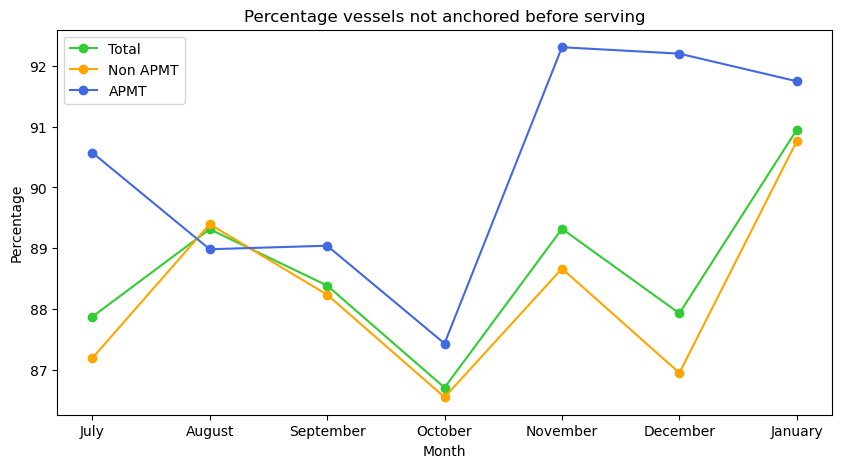

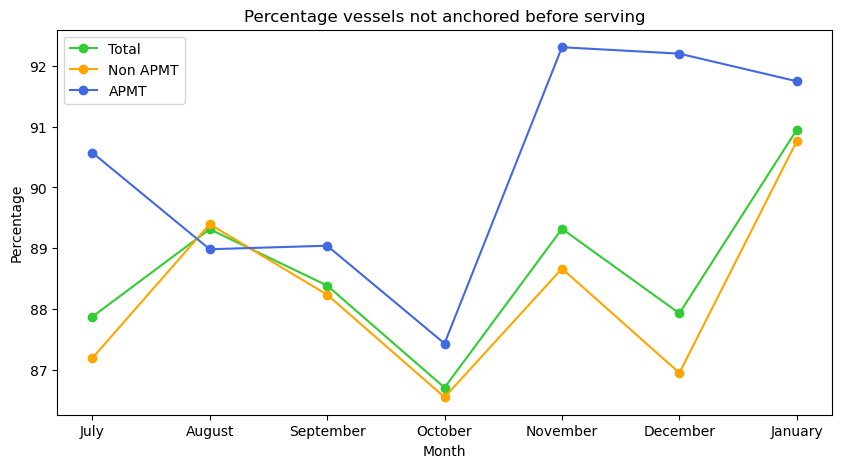

In [18]:
def percentage_vessels_not_anchored_before_serving_line():
    fig = plt.figure(figsize=(10,5))
    plt.plot(moor_anchor_df["total_instantly_served_per"],label="Total",marker="o",color=total_c)
    plt.plot(moor_anchor_df["non_apmt_instantly_served_per"],label="Non APMT",marker="o",color=non_apmt_c)
    plt.plot(moor_anchor_df["apmt_instantly_served_per"],label="APMT",marker="o",color=apmt_c)
    plt.title("Percentage vessels not anchored before serving")
    plt.ylabel("Percentage")
    plt.xlabel("Month")
    plt.legend()
    
    return fig

percentage_vessels_not_anchored_before_serving_line()

74.96625


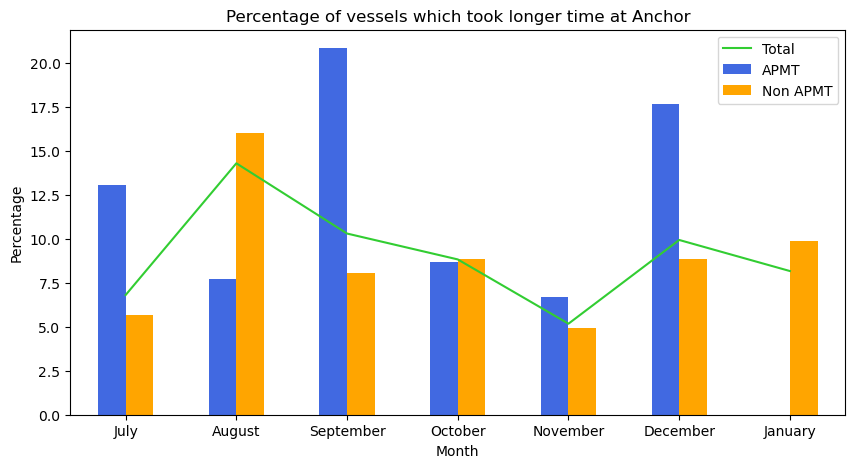

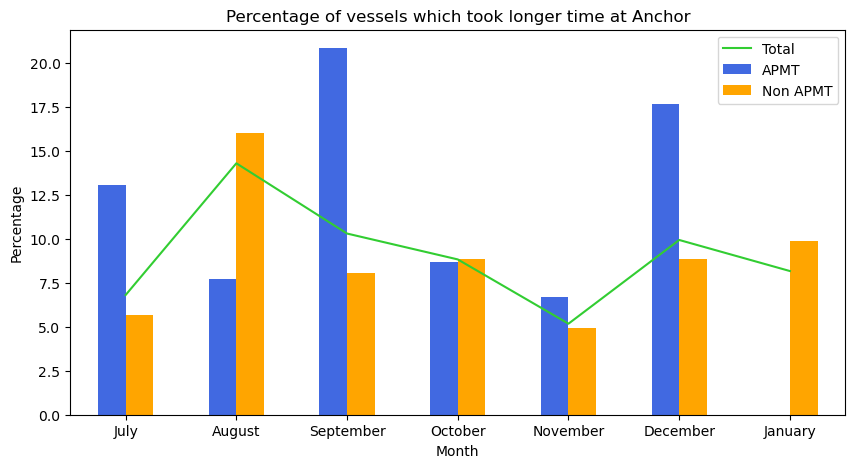

In [12]:
def percentage_of_vessels_which_took_longer_time_at_anchor():
    
    fig, axs = plt.subplots()

    non_apmt_full_lt = []
    for lt in moor_anchor_df["non_apmt_port_calls_anchor_data"].to_list(): 
        non_apmt_full_lt.append([round(float(dur),2) for dur in lt[1:-1].split(", ")])

    apmt_full_lt = []
    for lt in moor_anchor_df["apmt_port_calls_anchor_data"].to_list(): 
        apmt_full_lt.append([round(float(dur),2) for dur in lt[1:-1].split(", ")])

    full_lt = [j for i in apmt_full_lt for j in i] + [j for i in non_apmt_full_lt for j in i]
    full_lt_ser = pd.Series(full_lt)

    Q1 = full_lt_ser.quantile(0.25)
    Q3 = full_lt_ser.quantile(0.75)
    IQR = Q3-Q1
    print(Q3+1.5*IQR)
    Data = {"July":{},"August":{},"September":{},"October":{},"November":{},"December":{},"January":{}}
    for i,mon in zip(range(len(apmt_full_lt)),Data):
        full_lt_i = apmt_full_lt[i] + non_apmt_full_lt[i]
        full_lt_i_ser = pd.Series(full_lt_i)
        apmt_full_lt_ser = pd.Series(apmt_full_lt[i])
        non_apmt_full_lt_ser = pd.Series(non_apmt_full_lt[i])
        Data[mon]["Total"] = len(full_lt_i_ser[full_lt_i_ser>(Q3+1.5*IQR)])/len(full_lt_i_ser)*100
        Data[mon]["APMT"] = len(apmt_full_lt_ser[apmt_full_lt_ser>(Q3+1.5*IQR)])/len(apmt_full_lt_ser)*100
        Data[mon]["Non APMT"] = len(non_apmt_full_lt_ser[non_apmt_full_lt_ser>(Q3+1.5*IQR)])/len(non_apmt_full_lt_ser)*100

    pd.DataFrame(Data).T.drop("Total",axis=1).plot.bar(figsize=(10,5),color=[apmt_c,non_apmt_c,],ax=axs)
    pd.DataFrame(Data).T["Total"].plot(color=total_c,ax=axs)
    plt.title("Percentage of vessels which took longer time at Anchor")
    plt.ylabel("Percentage")
    plt.xlabel("Month")
    plt.legend()

    return fig

percentage_of_vessels_which_took_longer_time_at_anchor()

42.25


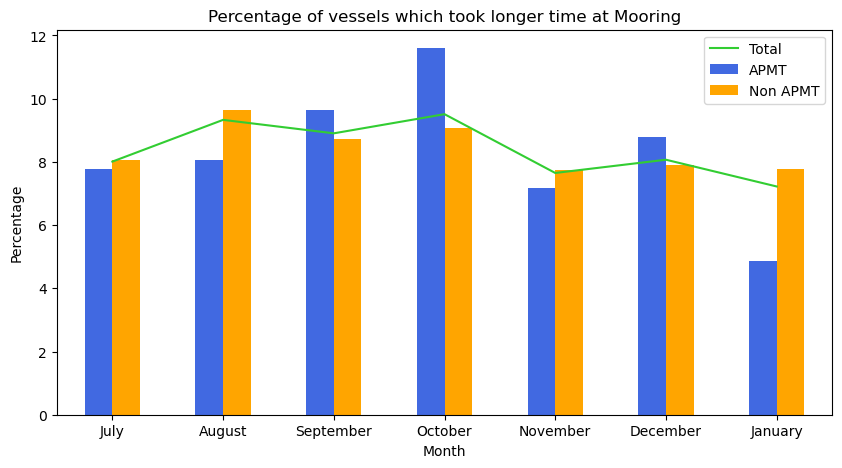

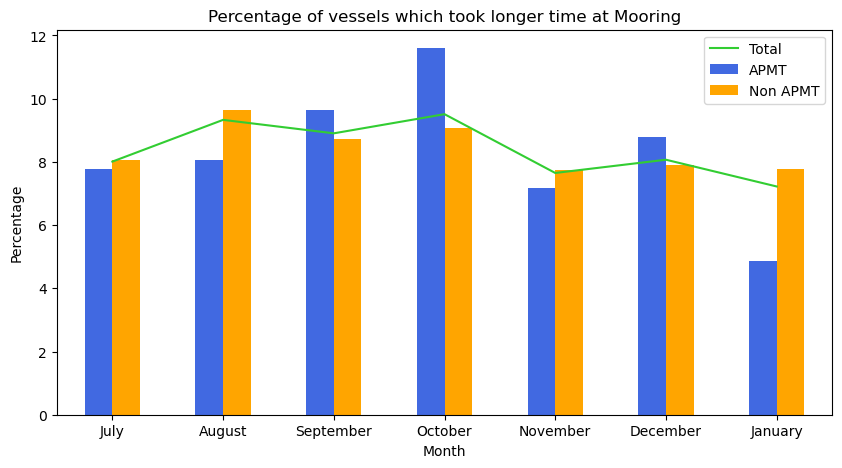

In [6]:
def percentage_of_vessels_which_took_longer_time_at_mooring():
    
    fig, axs = plt.subplots()

    non_apmt_full_lt = []
    for lt in moor_anchor_df["non_apmt_port_calls_moor_data"].to_list(): 
        non_apmt_full_lt.append([round(float(dur),2) for dur in lt[1:-1].split(", ")])

    apmt_full_lt = []
    for lt in moor_anchor_df["apmt_port_calls_moor_data"].to_list(): 
        apmt_full_lt.append([round(float(dur),2) for dur in lt[1:-1].split(", ")])

    full_lt = [j for i in apmt_full_lt for j in i] + [j for i in non_apmt_full_lt for j in i]
    full_lt_ser = pd.Series(full_lt)

    Q1 = full_lt_ser.quantile(0.25)
    Q3 = full_lt_ser.quantile(0.75)
    IQR = Q3-Q1
    print(Q3+1.5*IQR)
    Data = {"July":{},"August":{},"September":{},"October":{},"November":{},"December":{},"January":{}}
    for i,mon in zip(range(len(apmt_full_lt)),Data):
        full_lt_i = apmt_full_lt[i] + non_apmt_full_lt[i]
        full_lt_i_ser = pd.Series(full_lt_i)
        apmt_full_lt_ser = pd.Series(apmt_full_lt[i])
        non_apmt_full_lt_ser = pd.Series(non_apmt_full_lt[i])
        Data[mon]["Total"] = len(full_lt_i_ser[full_lt_i_ser>(Q3+1.5*IQR)])/len(full_lt_i_ser)*100
        Data[mon]["APMT"] = len(apmt_full_lt_ser[apmt_full_lt_ser>(Q3+1.5*IQR)])/len(apmt_full_lt_ser)*100
        Data[mon]["Non APMT"] = len(non_apmt_full_lt_ser[non_apmt_full_lt_ser>(Q3+1.5*IQR)])/len(non_apmt_full_lt_ser)*100


    pd.DataFrame(Data).T.drop("Total",axis=1).plot.bar(figsize=(10,5),color=[apmt_c,non_apmt_c],label=["APMT","Non APMT"],ax=axs)
    pd.DataFrame(Data).T["Total"].plot(color=total_c,ax=axs)
    plt.title("Percentage of vessels which took longer time at Mooring")
    plt.ylabel("Percentage")
    plt.xlabel("Month")
    plt.legend()
    
    return fig

percentage_of_vessels_which_took_longer_time_at_mooring()

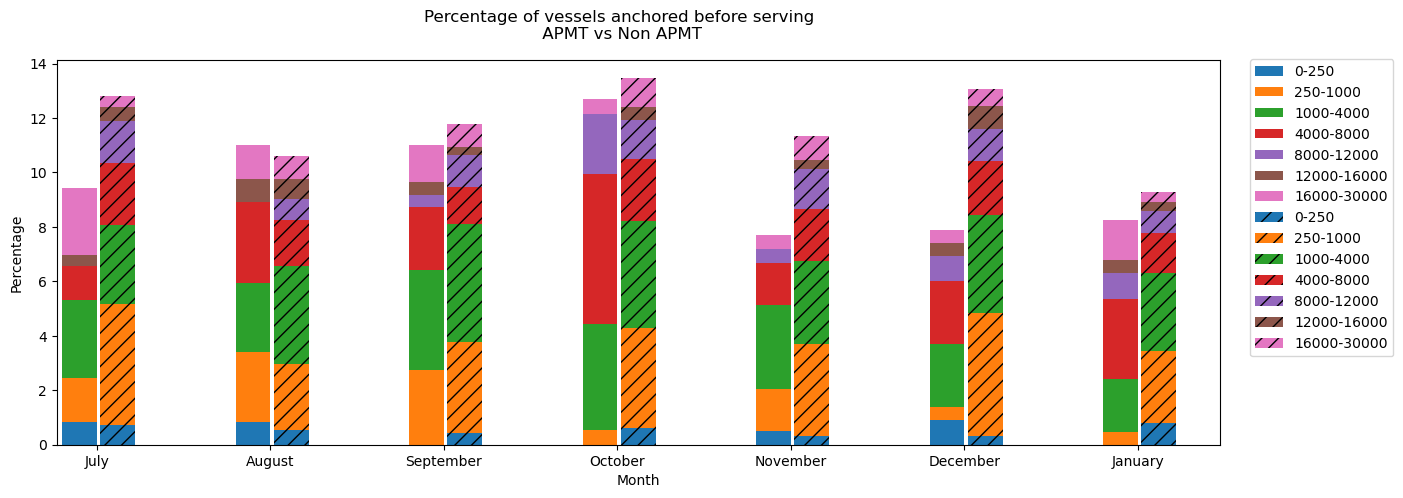

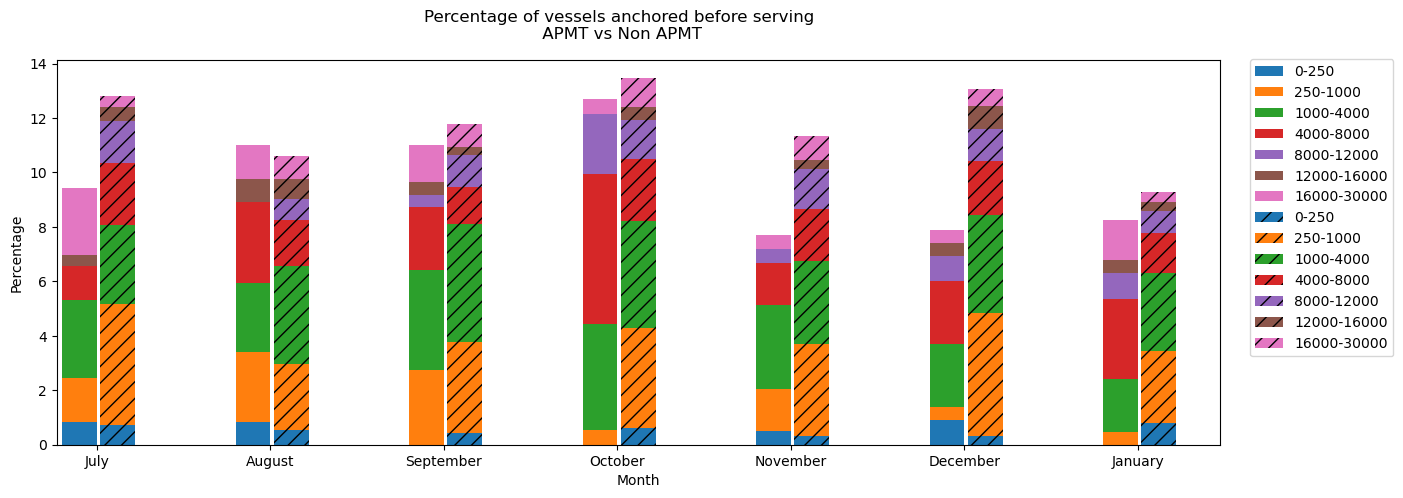

In [29]:
def percentage_of_vessels_anchored_before_serving():

    fig, axs = plt.subplots()
    plt.suptitle("Percentage of vessels anchored before serving\n APMT vs Non APMT")
    len_data = []
    imo_data = []
    for lt,mon in zip(moor_anchor_dfv2["apmt_port_calls_anchor_data"].to_list(),list(moor_anchor_dfv2.index)):
        for imo_dur in lt[1:-1].split(", "):
            imo = int(imo_dur[2:-1].split("': ")[0])
            dur = round(float(imo_dur[2:-1].split("': ")[1]),2)
            imo_data.append([imo,dur,mon])
        len_data.append(len(imo_data))

    imo_dur_mon_df = pd.DataFrame(imo_data)
    imo_dur_mon_df.columns = ["imo","dur","Month"]

    apmt_anchor_data = imo_dur_mon_df.merge(imo_to_teu,on="imo",how="left")

    len_data = []
    imo_data = []
    for lt,mon in zip(moor_anchor_dfv2["apmt_port_calls_moor_data"].to_list(),list(moor_anchor_dfv2.index)):
        for imo_dur in lt[1:-1].split(", "):
            imo = int(imo_dur[2:-1].split("': ")[0])
            dur = round(float(imo_dur[2:-1].split("': ")[1]),2)
            imo_data.append([imo,dur,mon])
        len_data.append(len(imo_data))

    imo_dur_mon_df = pd.DataFrame(imo_data)
    imo_dur_mon_df.columns = ["imo","dur","Month"]

    apmt_moor_data = imo_dur_mon_df.merge(imo_to_teu,on="imo",how="left")

    plot_df = apmt_anchor_data.groupby('vesteu')['Month'].value_counts().unstack('vesteu').fillna(0)
    plot_df["order"] = [2,6,7,1,5,4,3]
    plot_df = plot_df.sort_values("order").iloc[:,:-1]
    
    plot_df = plot_df.T
    plot_df["order"] = [1,3,6,7,2,4,5]
    plot_df = plot_df.sort_values("order").iloc[:,:-1]
    plot_df = plot_df.T

    (((plot_df.T / moor_anchor_dfv2["apmt_port_calls"]).T)*100).plot.bar(stacked=True,ax=axs,figsize=(15,5),position=1,width=.2,rot=0,label="APMT")

    len_data = []
    imo_data = []
    for lt,mon in zip(moor_anchor_dfv2["non_apmt_port_calls_anchor_data"].to_list(),list(moor_anchor_dfv2.index)):
        for imo_dur in lt[1:-1].split(", "):
            imo = int(imo_dur[2:-1].split("': ")[0])
            dur = round(float(imo_dur[2:-1].split("': ")[1]),2)
            imo_data.append([imo,dur,mon])
        len_data.append(len(imo_data))

    imo_dur_mon_df = pd.DataFrame(imo_data)
    imo_dur_mon_df.columns = ["imo","dur","Month"]

    non_apmt_anchor_data = imo_dur_mon_df.merge(imo_to_teu,on="imo",how="left")

    len_data = []
    imo_data = []
    for lt,mon in zip(moor_anchor_dfv2["non_apmt_port_calls_moor_data"].to_list(),list(moor_anchor_dfv2.index)):
        for imo_dur in lt[1:-1].split(", "):
            imo = int(imo_dur[2:-1].split("': ")[0])
            dur = round(float(imo_dur[2:-1].split("': ")[1]),2)
            imo_data.append([imo,dur,mon])
        len_data.append(len(imo_data))

    imo_dur_mon_df = pd.DataFrame(imo_data)
    imo_dur_mon_df.columns = ["imo","dur","Month"]

    non_apmt_moor_data = imo_dur_mon_df.merge(imo_to_teu,on="imo",how="left")

    plot_df = non_apmt_anchor_data.groupby('vesteu')['Month'].value_counts().unstack('vesteu').fillna(0)
    plot_df["order"] = [2,6,7,1,5,4,3]
    plot_df = plot_df.sort_values("order").iloc[:,:-1]
    
    plot_df = plot_df.T
    plot_df["order"] = [1,3,6,7,2,4,5]
    plot_df = plot_df.sort_values("order").iloc[:,:-1]
    plot_df = plot_df.T

    (((plot_df.T / moor_anchor_dfv2["non_apmt_port_calls"]).T)*100).plot.bar(stacked=True,ax=axs,figsize=(15,5),position=-0.1,width=.2,rot=0,label="Non APMT",hatch="//")

    plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1.02))
    plt.ylabel("Percentage")
    plt.xlabel("Month")
    
    return fig

percentage_of_vessels_anchored_before_serving()

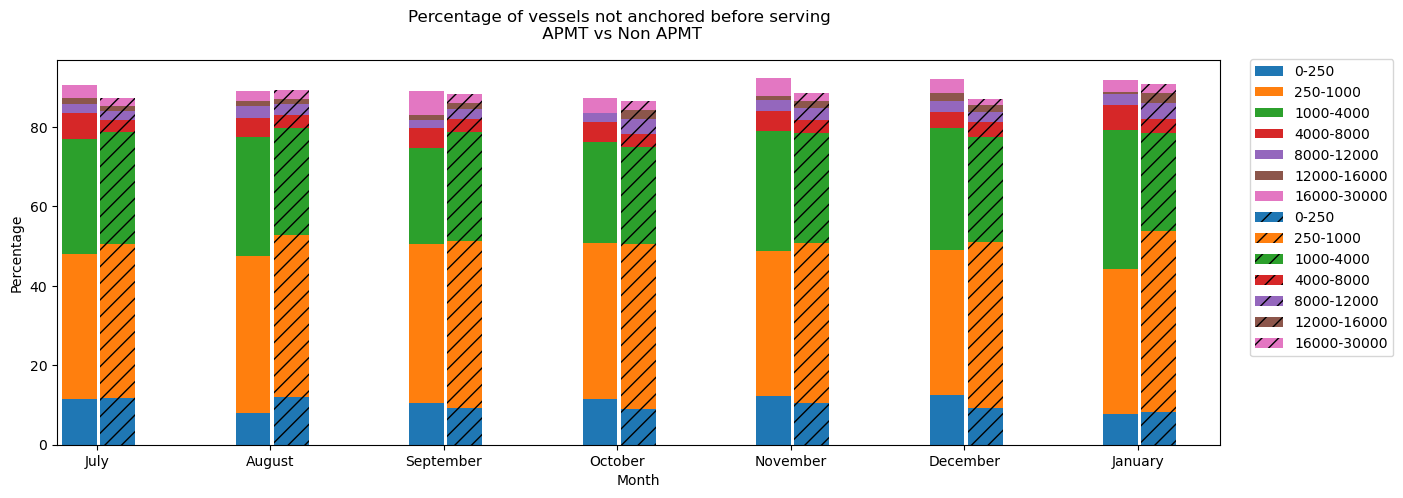

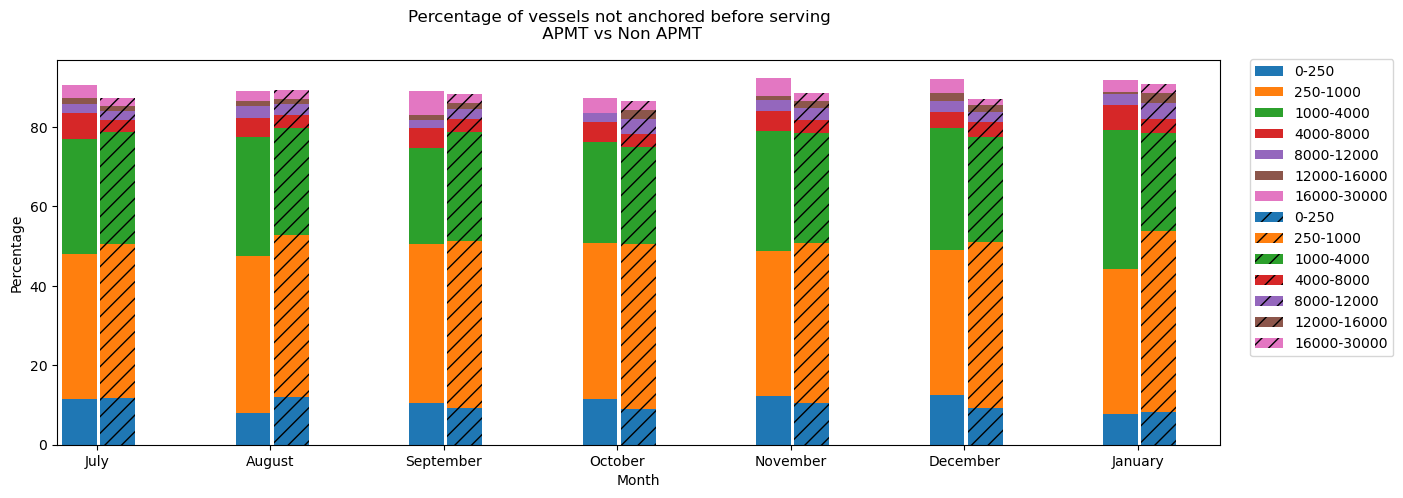

In [26]:
def percentage_of_vessels_not_anchored_before_serving():
    
    fig, axs = plt.subplots()
    plt.suptitle("Percentage of vessels not anchored before serving\n APMT vs Non APMT")
    len_data = []
    imo_data = []
    for lt,mon in zip(moor_anchor_dfv2["apmt_port_calls_anchor_data"].to_list(),list(moor_anchor_dfv2.index)):
        for imo_dur in lt[1:-1].split(", "):
            imo = int(imo_dur[2:-1].split("': ")[0])
            dur = round(float(imo_dur[2:-1].split("': ")[1]),2)
            imo_data.append([imo,dur,mon])
        len_data.append(len(imo_data))

    imo_dur_mon_df = pd.DataFrame(imo_data)
    imo_dur_mon_df.columns = ["imo","dur","Month"]

    apmt_anchor_data = imo_dur_mon_df.merge(imo_to_teu,on="imo",how="left")

    len_data = []
    imo_data = []
    for lt,mon in zip(moor_anchor_dfv2["apmt_port_calls_moor_data"].to_list(),list(moor_anchor_dfv2.index)):
        for imo_dur in lt[1:-1].split(", "):
            imo = int(imo_dur[2:-1].split("': ")[0])
            dur = round(float(imo_dur[2:-1].split("': ")[1]),2)
            imo_data.append([imo,dur,mon])
        len_data.append(len(imo_data))

    imo_dur_mon_df = pd.DataFrame(imo_data)
    imo_dur_mon_df.columns = ["imo","dur","Month"]

    apmt_moor_data = imo_dur_mon_df.merge(imo_to_teu,on="imo",how="left")

    plot_df = (apmt_moor_data.groupby('vesteu')['Month'].value_counts().unstack('vesteu').fillna(0) - apmt_anchor_data.groupby('vesteu')['Month'].value_counts().unstack('vesteu').fillna(0) )
    plot_df["order"] = [2,6,7,1,5,4,3]
    plot_df = plot_df.sort_values("order").iloc[:,:-1]

    plot_df = plot_df.T
    plot_df["order"] = [1,3,6,7,2,4,5]
    plot_df = plot_df.sort_values("order").iloc[:,:-1]
    plot_df = plot_df.T

    (((plot_df.T / moor_anchor_dfv2["apmt_port_calls"]).T)*100).plot.bar(stacked=True,ax=axs,figsize=(15,5),position=1,width=.2,rot=0,label="APMT")

    len_data = []
    imo_data = []
    for lt,mon in zip(moor_anchor_dfv2["non_apmt_port_calls_anchor_data"].to_list(),list(moor_anchor_dfv2.index)):
        for imo_dur in lt[1:-1].split(", "):
            imo = int(imo_dur[2:-1].split("': ")[0])
            dur = round(float(imo_dur[2:-1].split("': ")[1]),2)
            imo_data.append([imo,dur,mon])
        len_data.append(len(imo_data))

    imo_dur_mon_df = pd.DataFrame(imo_data)
    imo_dur_mon_df.columns = ["imo","dur","Month"]

    non_apmt_anchor_data = imo_dur_mon_df.merge(imo_to_teu,on="imo",how="left")

    len_data = []
    imo_data = []
    for lt,mon in zip(moor_anchor_dfv2["non_apmt_port_calls_moor_data"].to_list(),list(moor_anchor_dfv2.index)):
        for imo_dur in lt[1:-1].split(", "):
            imo = int(imo_dur[2:-1].split("': ")[0])
            dur = round(float(imo_dur[2:-1].split("': ")[1]),2)
            imo_data.append([imo,dur,mon])
        len_data.append(len(imo_data))

    imo_dur_mon_df = pd.DataFrame(imo_data)
    imo_dur_mon_df.columns = ["imo","dur","Month"]

    non_apmt_moor_data = imo_dur_mon_df.merge(imo_to_teu,on="imo",how="left")

    plot_df = (non_apmt_moor_data.groupby('vesteu')['Month'].value_counts().unstack('vesteu').fillna(0) - non_apmt_anchor_data.groupby('vesteu')['Month'].value_counts().unstack('vesteu').fillna(0) )
    plot_df["order"] = [2,6,7,1,5,4,3]
    plot_df = plot_df.sort_values("order").iloc[:,:-1]

    plot_df = plot_df.T
    plot_df["order"] = [1,3,6,7,2,4,5]
    plot_df = plot_df.sort_values("order").iloc[:,:-1]
    plot_df = plot_df.T

    (((plot_df.T / moor_anchor_dfv2["non_apmt_port_calls"]).T)*100).plot.bar(stacked=True,ax=axs,figsize=(15,5),position=-0.1,width=.2,rot=0,label="Non APMT",hatch="//")

    plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1.02))
    plt.ylabel("Percentage")
    plt.xlabel("Month")
    
    return fig

percentage_of_vessels_not_anchored_before_serving()

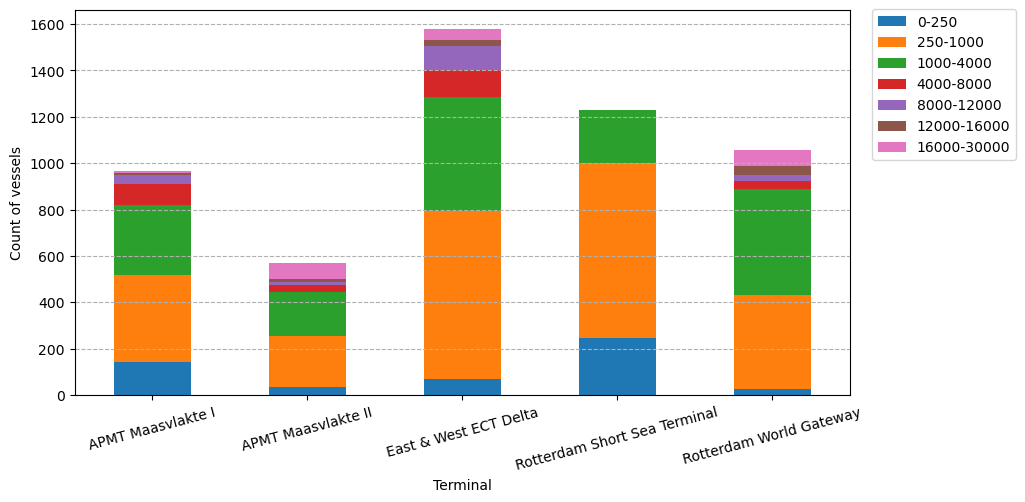

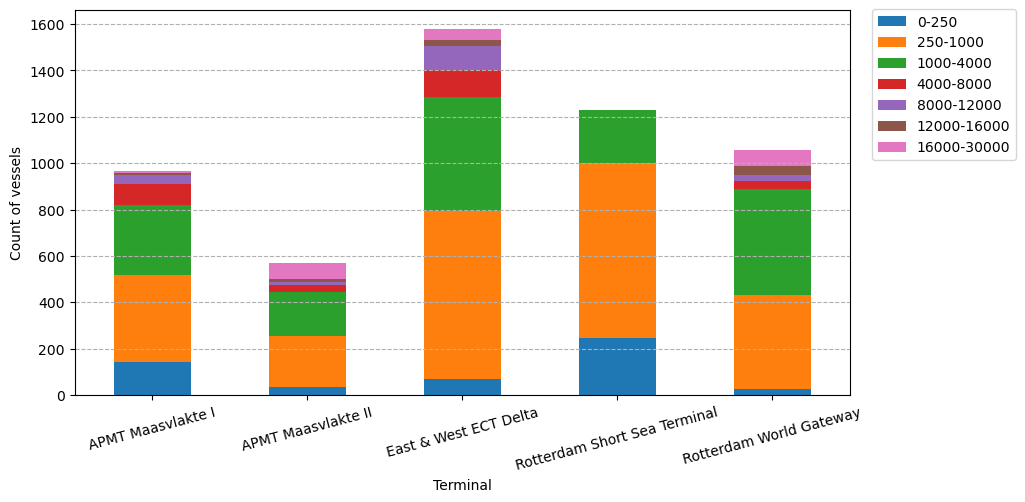

In [35]:
def vessel_distribution_count():

    plot_df = pd.read_csv("data/Vessel_Distribution_Count.csv",header=[0],index_col=[0])

    fig, axs = plt.subplots()
    plot_df.plot.bar(stacked=True,figsize=(10, 5),ax=axs)

    plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1.02))
    plt.xlabel("Terminal")
    plt.ylabel("Count of vessels")
    plt.xticks(rotation=15)
    plt.grid(axis = 'y',linestyle = '--')
    
    return fig

vessel_distribution_count()

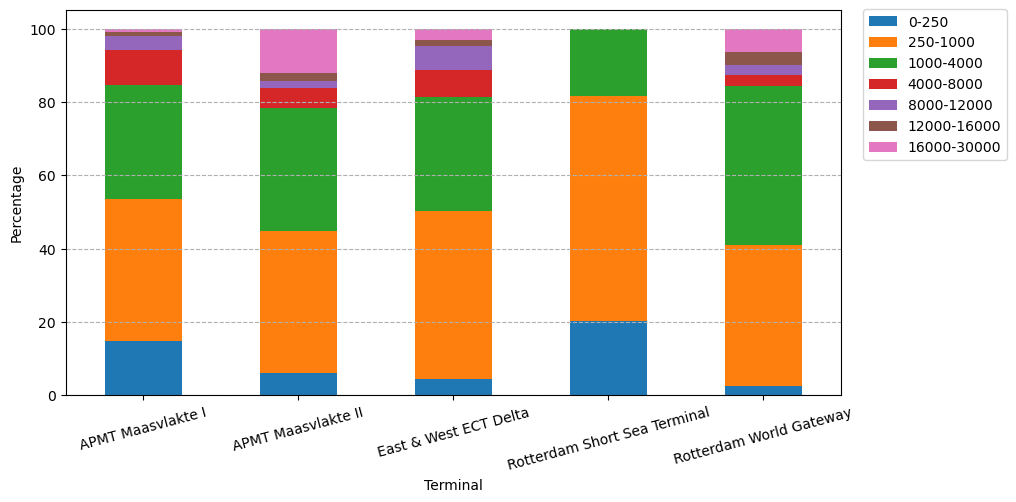

In [22]:
plot_df = pd.read_csv("data/Vessel_Distribution_Percentage.csv",header=[0],index_col=[0])

fig, axs = plt.subplots()
plot_df.plot.bar(stacked=True,figsize=(10, 5),ax=axs)

plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1.02))
plt.xlabel("Terminal")
plt.ylabel("Percentage")
plt.xticks(
    rotation=15 
)
plt.grid(axis = 'y',linestyle = '--')
plt.show()

Text(0.5, 0, 'Months')

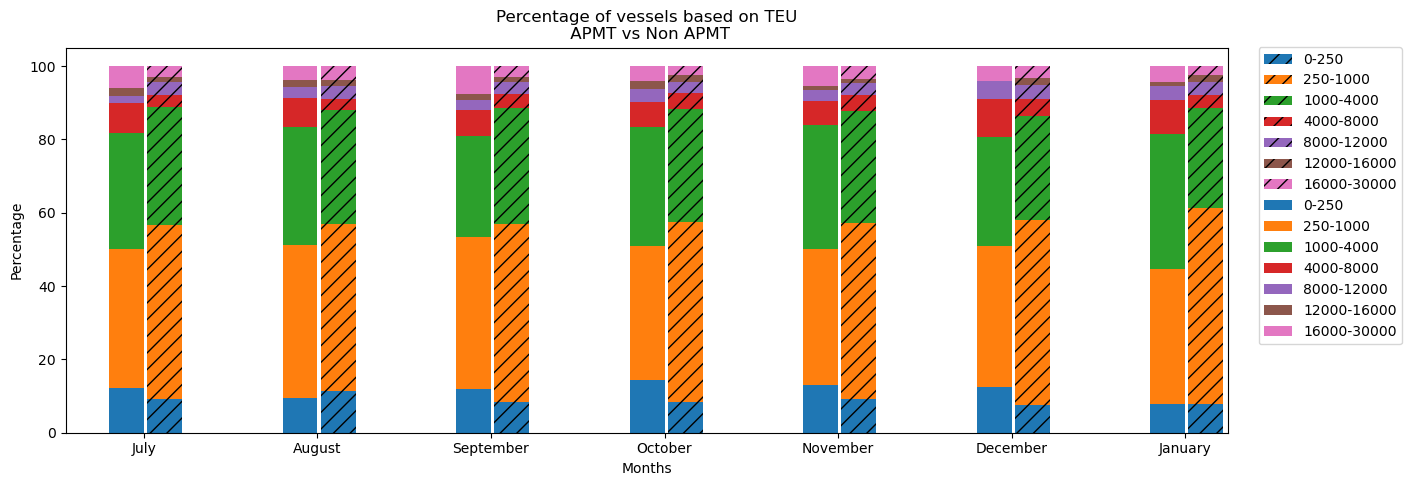

In [15]:
df = pd.read_csv("Percentage_of_vessels_based_on_TEU.csv",header=[0,1],index_col=[0])*100

apmt_plot_df = df["APMT"]
non_apmt_plot_df = df["Non APMT"]

fig, axs = plt.subplots()
(non_apmt_plot_df).plot.bar(stacked=True,figsize=(15, 5),ax=axs,position=-0.1,width=.2,rot=0,label="Non APMT",hatch="//")
(apmt_plot_df).plot.bar(stacked=True,figsize=(15, 5),ax=axs,position=1,width=.2,rot=0,label="APMT")

plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1.02))
plt.title("Percentage of vessels based on TEU\n APMT vs Non APMT")
plt.ylabel("Percentage")
plt.xlabel("Months")

Text(0.5, 0, 'Shipping Lines')

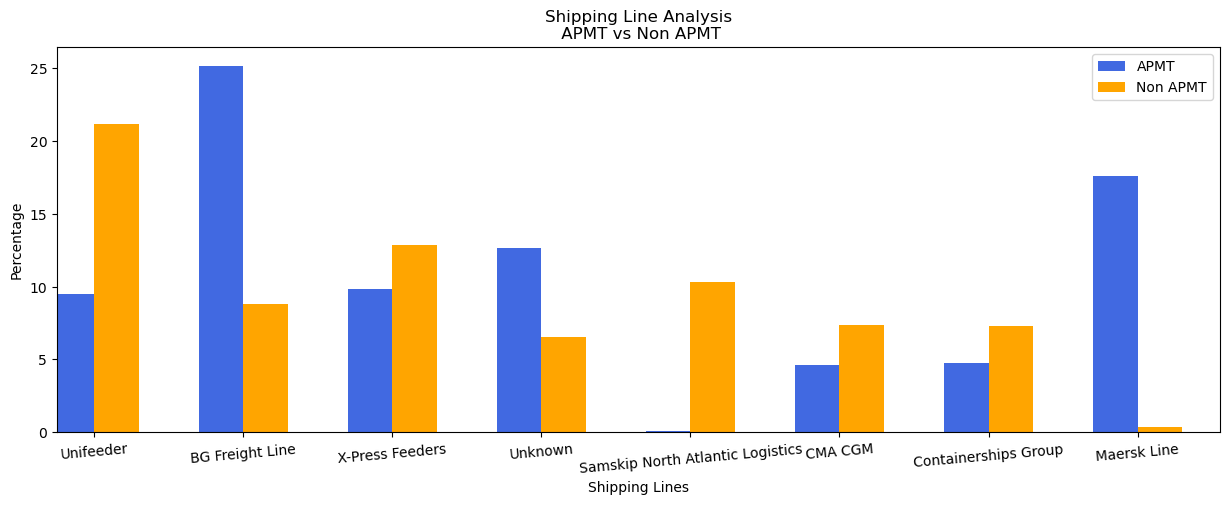

In [13]:
df = pd.read_csv("Shipping_Line_Analysis.csv",header=[0],index_col=[0])
apmt_plot_df = df["APMT"]
non_apmt_plot_df = df["Non APMT"]

fig, axs = plt.subplots()
(apmt_plot_df).plot.bar(ax=axs,figsize=(15,5),position=1,width=.3,rot=5,color=apmt_c,label="APMT")
(non_apmt_plot_df).plot.bar(ax=axs,figsize=(15,5),position=0,width=.3,rot=5,color=non_apmt_c,label="Non APMT")


plt.legend(loc="upper left",bbox_to_anchor=(1.02, 1.02))
plt.title("Shipping Line Analysis\n APMT vs Non APMT")
plt.legend()
plt.ylabel("Percentage")
plt.xlabel("Shipping Lines")